# <font color="#8333ff">Soutenance groupe 5 : Test de recrutement Quantmetry </font>



Enoncé Le jeu de données contenu dans data.csv décrit des candidatures au poste de chercheur d’or chez OrFée. Votre objectif consiste à prédire le succès ou l’échec d’une candidature.

Le jeu de données comporte 11 colonnes.

Statistiques descriptives

Décrivez le jeu de données. Présentez seulement les analyses et éventuels retraitements qui vous paraissent les plus pertinents et faites une première conclusion sur les variables à sélectionner en vue de la prédiction du succès ou de l’échec d’une candidature.

Y a-t-il une dépendance statistiquement significative entre : (a) La spécialité et le sexe ? (b) La couleur de cheveux et le salaire demandé ? (c) Le nombre d’années d’expérience et la note à l’exercice ?

Machine Learning

Concevez un modèle permettant de prédire la variable embauche et expliquez votre choix d’algorithme. Si votre modèle comporte des spécificités de paramétrage, justifiez également vos choix de paramètres.

Quelles sont les variables les plus importantes de votre modèle? Commentez.

Décrivez et justifiez le critère de performance utilisé.

Proposez deux à trois pistes d’amélioration de votre modèle

In [287]:
#pip install pandas-profiling

###### Installation de la librairie researchpy (à faire une fois), redémarrer le kernel jupyter ensuite

In [288]:
#pip install researchpy

In [289]:
#Chargement des librairie nécessaires


import os
import argparse
import pandas as pd
import numpy as np
import statsmodels.api
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

In [290]:
#lecture du chemin

chemin=os.getcwd()
df = pd.read_csv(chemin + "/" + "data_v1.0.csv", encoding="unicode_escape")

In [291]:
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [292]:
df.shape

(20000, 13)

In [293]:
df.dtypes

Unnamed: 0      int64
index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe           object
diplome        object
specialite     object
note          float64
dispo          object
embauche        int64
dtype: object

In [294]:
#drop unused columns 

df.drop(["Unnamed: 0", "index"], axis=1, inplace=True)

In [295]:
df.head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [296]:
df.describe ()

,age,exp,salaire,note,embauche
count,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000
mean,35.004521,9.500352,34974.343934,75.168762,0.114600
std,9.609169,3.012109,5003.099616,17.095926,0.318547
min,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,29.000000,7.000000,31596.000000,63.720000,0.000000
50%,35.000000,9.000000,34979.000000,75.080000,0.000000
75%,41.000000,12.000000,38358.000000,86.617500,0.000000
max,74.000000,23.000000,53977.000000,143.220000,1.000000


###### Afin d'étudier la prédiction d'embauche, nous allons selectionner les valeurs les plus pertinetntes: diplôme, date,
###### Faire une inspection et visualisation afin de voir la correlation entre ces valeurs

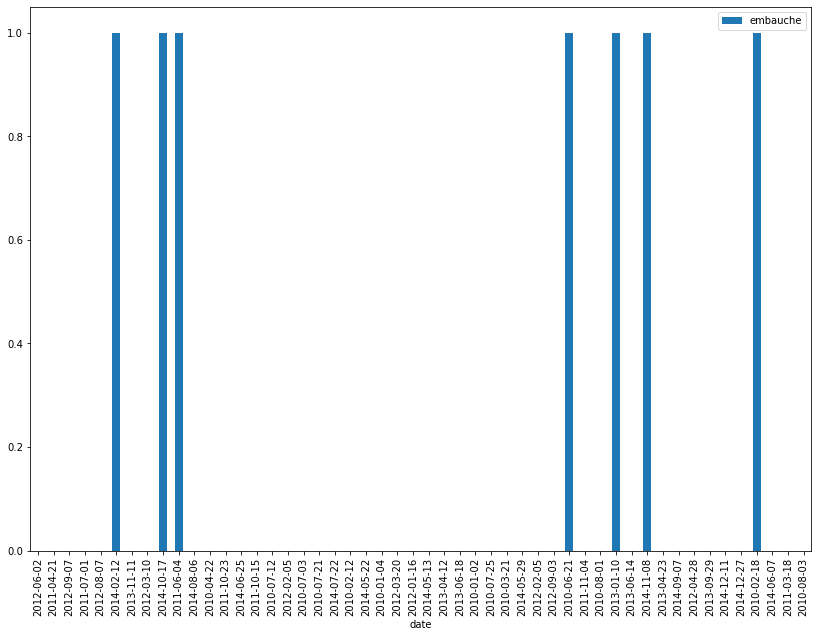

In [297]:
#viz, inspection on value date of application and assumption(embauche)
#viz,sur la valeur date et embauche

df.head(50).plot(x="date",y="embauche", kind="bar", figsize=(14,10))

###### On remarque que à certaines dates, il y'a pas eu de candidatures

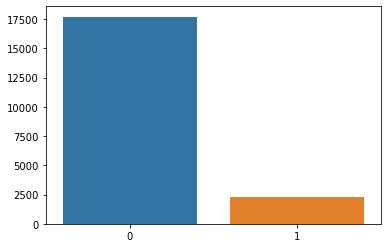

In [298]:
# Count values labels (to deal with unbalanced labels, statistics on labels)
# on compte les valeurs ,pour evidencier les valeurs non équilibeés

y=df["embauche"].value_counts()
sns.barplot(y.index, y.values)

#### étude statistique sur les valeurs continues

In [299]:
#counts sur les valeurs continues


print("#########  cheveux ###########")
print(df["cheveux"].value_counts())
print("#########  sexe ###########")
print(df["sexe"].value_counts())
print("#########  diplome ###########")
print(df["diplome"].value_counts())
print("#########  specialite ###########")
print(df["specialite"].value_counts())
print("#########  dispo ###########")
print(df["dispo"].value_counts())

#########  cheveux ###########
chatain    6022
brun       5991
blond      5929
roux       1955
Name: cheveux, dtype: int64
#########  sexe ###########
M    11889
F     8011
Name: sexe, dtype: int64
#########  diplome ###########
master      7513
licence     7377
doctorat    2547
bac         2453
Name: diplome, dtype: int64
#########  specialite ###########
geologie       10028
forage          4340
detective       4155
archeologie     1384
Name: specialite, dtype: int64
#########  dispo ###########
non    11848
oui     8046
Name: dispo, dtype: int64


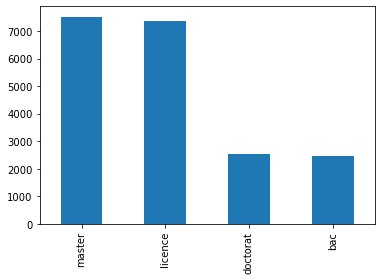

In [300]:
#inspection viz on diplome


df["diplome"].value_counts().plot(kind="bar")

### Stats on NAN per column

In [301]:
df.isnull().sum(axis = 0)

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [302]:
#chemin=os.getcwd()

#df = pd.read_csv(chemin + "/" + "data_v1.0.csv", index_col= 0, header=0)
#df = pd.read_csv(chemin + "/" + "data_v1.0.csv", index_col= 0, header=0, usecols=range(2,13),encoding="unicode_escape")
#df.head()

##### edition d'un rapport html "rapport_Data_Set.html" sur le jeu de données (overview, relations)

In [303]:
print ("#[1]============ Profilage du jeux de données ================")
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="rapport_Data_Set.html")

#[1]============ Profilage du jeux de données ================


### Stat sur les cellules vides

In [304]:
df.isnull().sum(axis = 0).sum()


999

In [305]:
df.isnull().sum(axis = 0)

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

### Rejet des lignes commportant des cellules vides
##### On peut le faire sans perturber le jeu de donnée, les valeurs NaN de chaque colonne représentant 1% du nombre de lignes

In [306]:
df.dropna(inplace=True)

### Ne conservons que les rangées comportant des valeurs cohérentes


In [307]:
df = df[df.age > 0]
df = df[df.exp > 0]

## Recherche des corrélations entre variables
##### source méthodologique : https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

#### Construction de 2 dataframes 1 contenant les variables catégorielles et l'autre sans celles-ci

In [308]:
# selection d'object type colonnes  uniquement  
df_objects = df.select_dtypes(include=['object']) 

# excluding object type column.
df_bar_objects = df.select_dtypes(exclude=['object']) 

##### Vectorization -> Variable catégorielle transformée en variables continues. 
##### Cette méthode permet d'obtenir la représentation numérique d'un tableau en identifiant des valeurs distinctes.

In [309]:
df_objects = df_objects.apply(lambda x : pd.factorize(x)[0]) 

#jointure des dataframes
df_final = df_bar_objects.join(df_objects) 

In [310]:
#matrice 

df_tmp = df[["age","exp"]].dropna()

X = df_tmp["age"].values
Y = df_tmp["exp"].values

rho = np.cov(X,Y) / (np.std(X)*np.std(Y))
print(rho)

[[ 3.20244847e+00 -1.67688187e-03]
 [-1.67688187e-03  3.12293962e-01]]


In [311]:
# spearman : Spearman rank correlation (non linear corr),qualitavie varr
#df.corr(method='spearman')


df_filter.corr(method='spearman', min_periods=1)

,age,exp,salaire,note,date,cheveux,sexe,diplome,specialite,dispo
age,1.000000,-0.004236,-0.000968,-0.005321,0.004243,0.000781,0.000664,-0.018580,-0.014247,-0.009740
exp,-0.004236,1.000000,0.006635,-0.012144,-0.001686,-0.002113,0.001654,-0.001670,0.000511,-0.006281
salaire,-0.000968,0.006635,1.000000,-0.424741,0.011394,0.043110,0.128753,-0.086822,0.124705,0.180334
note,-0.005321,-0.012144,-0.424741,1.000000,-0.006383,0.023816,-0.259047,0.109517,0.166568,0.342592
date,0.004243,-0.001686,0.011394,-0.006383,1.000000,-0.000297,0.010322,-0.003530,0.010818,0.001037
cheveux,0.000781,-0.002113,0.043110,0.023816,-0.000297,1.000000,-0.176436,-0.028562,0.088133,0.070314
sexe,0.000664,0.001654,0.128753,-0.259047,0.010322,-0.176436,1.000000,-0.017828,-0.366420,0.068315
diplome,-0.018580,-0.001670,-0.086822,0.109517,-0.003530,-0.028562,-0.017828,1.000000,0.015779,0.148106
specialite,-0.014247,0.000511,0.124705,0.166568,0.010818,0.088133,-0.366420,0.015779,1.000000,0.383247
dispo,-0.009740,-0.006281,0.180334,0.342592,0.001037,0.070314,0.068315,0.148106,0.383247,1.000000


## pearson : standard correlation coefficient (linear corr)
##### df.corr(method='pearson'). Pearson’s correlation measures the **linear association** between continuous variables.

##### Interpreting the value of ρ :
###### - 0.9 to 1 positive or negative indicates a very strong correlation.
###### - 0.7 to 0.9 positive or negative indicates a strong correlation.
###### - 0.5 to 0.7 positive or negative indicates a moderate correlation.
###### - 0.3 to 0.5 positive or negative indicates a weak correlation.
###### - 0 to 0.3 positive or negative indicates a negligible correlation.


In [312]:
df_filter = df_final.drop(["embauche"], axis=1).copy()
df_filter.corr(method='pearson', min_periods=1)

,age,exp,salaire,note,date,cheveux,sexe,diplome,specialite,dispo
age,1.000000,-0.001677,-0.000475,-0.003551,0.004280,-0.000139,0.000565,-0.013277,-0.017649,-0.011052
exp,-0.001677,1.000000,0.010133,-0.010365,-0.001816,-0.002870,0.002336,0.000466,0.003769,-0.003828
salaire,-0.000475,0.010133,1.000000,-0.447423,0.011337,0.043774,0.129525,-0.011765,0.127214,0.179341
note,-0.003551,-0.010365,-0.447423,1.000000,-0.007437,0.030569,-0.266362,-0.002436,0.173104,0.343710
date,0.004280,-0.001816,0.011337,-0.007437,1.000000,-0.000964,0.010218,0.000344,0.011302,0.001205
cheveux,-0.000139,-0.002870,0.043774,0.030569,-0.000964,1.000000,-0.183066,-0.111150,0.092737,0.073895
sexe,0.000565,0.002336,0.129525,-0.266362,0.010218,-0.183066,1.000000,-0.007262,-0.368455,0.068315
diplome,-0.013277,0.000466,-0.011765,-0.002436,0.000344,-0.111150,-0.007262,1.000000,-0.000789,0.059390
specialite,-0.017649,0.003769,0.127214,0.173104,0.011302,0.092737,-0.368455,-0.000789,1.000000,0.381608
dispo,-0.011052,-0.003828,0.179341,0.343710,0.001205,0.073895,0.068315,0.059390,0.381608,1.000000


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'exp'),
 Text(2.5, 0, 'salaire'),
 Text(3.5, 0, 'note'),
 Text(4.5, 0, 'date'),
 Text(5.5, 0, 'cheveux'),
 Text(6.5, 0, 'sexe'),
 Text(7.5, 0, 'diplome'),
 Text(8.5, 0, 'specialite'),
 Text(9.5, 0, 'dispo')]

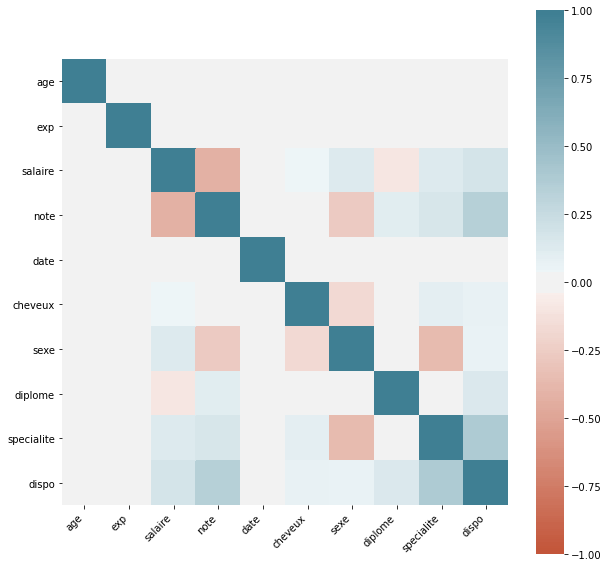

In [313]:
import seaborn as sns
corr = df_filter.corr(method='spearman', min_periods=1)

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

##### salaire et note presentent une correlation appreciable
###### cheveux et sexe une correlation faible
###### sexe et specilaité...

## Spearman Correlation Coefficient
##### The Spearman correlation coefficient is indicated for the calculation of the correlation between random variables x and y related monotonically to each other, **but not necessarily linearly**. If the relation is linear Pearson’s method is the most indicated.

In [314]:
df_filter = df_final.drop(["embauche"], axis=1).copy()
df_filter.corr(method='spearman', min_periods=1)

,age,exp,salaire,note,date,cheveux,sexe,diplome,specialite,dispo
age,1.000000,-0.004236,-0.000968,-0.005321,0.004243,0.000781,0.000664,-0.018580,-0.014247,-0.009740
exp,-0.004236,1.000000,0.006635,-0.012144,-0.001686,-0.002113,0.001654,-0.001670,0.000511,-0.006281
salaire,-0.000968,0.006635,1.000000,-0.424741,0.011394,0.043110,0.128753,-0.086822,0.124705,0.180334
note,-0.005321,-0.012144,-0.424741,1.000000,-0.006383,0.023816,-0.259047,0.109517,0.166568,0.342592
date,0.004243,-0.001686,0.011394,-0.006383,1.000000,-0.000297,0.010322,-0.003530,0.010818,0.001037
cheveux,0.000781,-0.002113,0.043110,0.023816,-0.000297,1.000000,-0.176436,-0.028562,0.088133,0.070314
sexe,0.000664,0.001654,0.128753,-0.259047,0.010322,-0.176436,1.000000,-0.017828,-0.366420,0.068315
diplome,-0.018580,-0.001670,-0.086822,0.109517,-0.003530,-0.028562,-0.017828,1.000000,0.015779,0.148106
specialite,-0.014247,0.000511,0.124705,0.166568,0.010818,0.088133,-0.366420,0.015779,1.000000,0.383247
dispo,-0.009740,-0.006281,0.180334,0.342592,0.001037,0.070314,0.068315,0.148106,0.383247,1.000000


##### conclusion il y corrélation (faible) entre : salaire/note, specialité/sexe, spécialité/dispo (négligeable) entre : sexe/cheveux

## Test du Khi-2 (est-ce que des variables catégorielles sont indépendantes ?)

###### Sexe et Spécialité sont 2 variables catégorielles (qui possède un nombre fini de catégories). Pour savoir si ces 2 variables sont liées
###### on utilise le test du Khi-2 [1]. En testant l’hypothèse nulle : “les 2 variables sexe et spécialité sont indépendantes”
###### https://datascientest.com/correlation-entre-variables-comment-mesurer-la-dependance 

#### table de contingence sexe/specialite et test du CHI2

In [315]:
table = pd.crosstab (df["sexe"],df["specialite"])
from scipy.stats import chi2_contingency

In [316]:
resultats_test = chi2_contingency(table)

In [317]:
statistique_de_test = resultats_test[0]
p_valeur = resultats_test[1]
degre_de_liberte = resultats_test[2]

###### Pour décider du rejet ou non de l’hypothèse nulle. On regarde la p_valeur. 
###### Si cette dernière est en-dessous de 5% alors on rejette l’hypothèse nulle.
###### Donc ici le test du Khi-2 nous permet d'affirmer que ces 2 variables sont liées.

In [318]:
if p_valeur <0.05 :  print ("Hypothèse nulle rejetée, les 2 variables sont liées")

Hypothèse nulle rejetée, les 2 variables sont liées


#### Détermination de la force de la relation entre ces 2 variables avec le calcul du V de cramer

In [319]:
import scipy.stats as ss
def cramers_corrected_stat (confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr=max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [320]:
cramers_corrected_stat(table)

0.3692143211241721

##### la relation entre ces 2 variable est modeste, car le calcul du V de cramer corrigé ci-dessus
##### est plus proche de zéro (relation faible) que de 0,9 (relation très forte)

In [321]:
import researchpy as rp

#### Analyse de la variance (ANOVA) à un facteur (corrélation entre une variable continue et une variable catégorielle)

##### si la variable cheveux n'a pas d'influence sur le variable catégorielle Salaire alors leur moyenne devraient être identiques
##### c'est l'hypothèse que nous testons quand on a recours à l'analyse de la variance

In [322]:
#[6] One Way anova with python
#print("\n\n#[6]==========librairie researchpy===============")
#[6.1] Calcul et affiche le calcul de la table Anova du salaire pour toutes les catégories de cheveux
print ("#[6.1] ANOVA ===salaire seul===\n",rp.summary_cont(df['salaire']))
#[6.2] Calcul et affiche le calcul de la table Anova du salaire par couleur de cheveux
print ("#[6.2] ANOVA ===salaire groupé par type de cheveux===\n",
       rp.summary_cont(df['salaire'].groupby(df['cheveux'])))
#[6.3] Calcul et affiche F-statistic and p-value du test
foneway=ss.f_oneway (df['salaire'][df['cheveux']  == 'chatain'],
             df['salaire'][df['cheveux'] == 'brun'],
             df['salaire'][df['cheveux'] == 'blond'],
             df['salaire'][df['cheveux'] == 'roux'])




#[6.1] ANOVA ===salaire seul===
   Variable        N        Mean         SD       SE  95% Conf.    Interval
0  salaire  18991.0  34967.7434  5003.8361  36.3102  34896.572  35038.9147


#[6.2] ANOVA ===salaire groupé par type de cheveux===
             N        Mean         SD        SE   95% Conf.    Interval
cheveux                                                               
blond    5644  34665.7271  5017.1326   66.7824  34534.8079  34796.6463
brun     5718  35027.1163  4936.2363   65.2791  34899.1446  35155.0880
chatain  5746  35381.5593  5006.8686   66.0516  35252.0733  35511.0454
roux     1883  34429.9304  5052.8025  116.4413  34201.5627  34658.2981


In [323]:
print ("\n#[6.3]====foneway====\n",foneway)


#[6.3]====foneway====
 F_onewayResult(statistic=27.58758818627994, pvalue=8.559223795642455e-18)


### PCA on Mixed data type (both categorical and continous variable)

In [324]:
!pip install prince 

You should consider upgrading via the '/Users/francois/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [325]:
### FAMD   (Factor Analysis of Mixed Data --> Including both categorial and continous variables)

In [326]:
import prince 


In [328]:
df_drop_embauche = df.drop(["embauche"], axis=1)

print("len df", len(df_drop_embauche))
df_drop_embauche = df_drop_embauche.dropna()
print("len df after dropping na", len(df_drop_embauche))

len df 18991
len df after dropping na 18991


In [331]:
n_components = 3
famd = prince.FAMD(n_components=n_components,
                   n_iter=10,
                   copy=True,
                   check_input=True, 
                   engine='auto',
                   random_state=42)

famd = famd.fit(df_drop_embauche) 

In [332]:
df_drop_embauche.head()

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non


           0         1         2
0  -1.257832  1.235778  0.104308
1   0.952984  0.011878  0.922357
2   0.307302  0.769231  1.245408
4  -0.872484  1.152389 -0.824683
5   0.840079  0.067402 -0.470954
6   1.194385 -0.502155  0.743682
7   1.135415 -0.783425 -0.027110
8  -0.346707  1.037128  0.311349
9   0.033368  0.044737  0.496056
10  1.167218  0.538401  0.675357


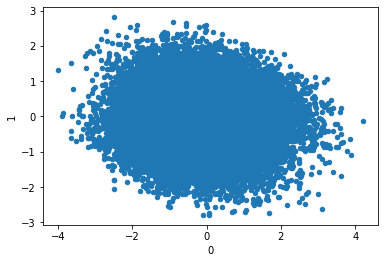

In [333]:
dim_reduction = famd.row_coordinates(df_drop_embauche)
print(dim_reduction.head(10))
dim_reduction.plot(x=0, y=1, kind="scatter")

In [334]:
print( "variance explained is %s with %s principal components" %(str(np.sum(famd.explained_inertia_)),str(n_components)))

variance explained is 0.005260442479424895 with 3 principal components


### PCA (Principal Component Analysis  --> Only countinuous variables : Categorical variables have been vectorized)

In [335]:
print("len df after dropping embauche", len(df_filter))
df_filter = df_filter.dropna()
print("len df after dropping na and embauche", len(df_filter))

len df after dropping embauche 18991
len df after dropping na and embauche 18991


           0         1         2
0   0.429578 -2.769404  0.163489
1  -1.285597  0.364511 -0.291883
2  -1.211811 -0.734090  0.023403
4   0.904053 -1.492929 -0.195111
5  -1.597177  0.154012 -0.338323
6  -1.017719  1.593254 -0.222288
7  -0.860741  1.672751  1.134200
8  -1.176723 -1.322396  0.262254
9  -0.731664 -0.374440 -0.201122
10 -0.656010  0.151010 -2.433530
variance explained is 0.44013516427307586 with 3 principal components


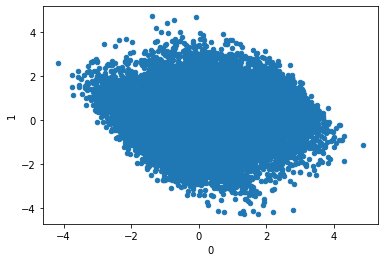

In [336]:
pca = prince.PCA(n_components=n_components,
                   n_iter=10,
                   copy=True,
                   check_input=True, 
                   engine='auto',
                   random_state=42)

pca = pca.fit(df_filter) 

dim_reduction = pca.row_coordinates(df_filter)
print(dim_reduction.head(10))
dim_reduction.plot(x=0, y=1, kind="scatter")
print( "variance explained is %s with %s principal components" %(str(np.sum(pca.explained_inertia_)),str(n_components)))

# Machine Learning

##### Code et analyse faits sur le Test de Quantmetry avec comme source le tutoriel et le code :
##### https://github.com/IBM/watson-studio-learning-path-assets/blob/master/notebooks/customer-churn-kaggle.ipynb

In [258]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [259]:
%matplotlib inline
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json
import time

In [260]:
chemin=os.getcwd()
df = pd.read_csv(chemin + "/" + "data_v1.0.csv", index_col= 0, header=0, usecols=range(0,13),encoding="unicode_escape")
df.head()

,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [261]:
df.dropna(inplace=True)

In [262]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# sexe, diplome, specialité and dispo are strings and we want discreet integer values
df['sexe'] = label_encoder.fit_transform(df['sexe'])
df['diplome'] = label_encoder.fit_transform(df['diplome'])
df['specialite'] = label_encoder.fit_transform(df['specialite'])
df['dispo'] = label_encoder.fit_transform(df['dispo'])

In [263]:
print (df.dtypes)
df.head()

index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe            int64
diplome         int64
specialite      int64
note          float64
dispo           int64
embauche        int64
dtype: object


,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,0,2,3,97.08,0,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,1,2,2,63.86,0,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,1,2,3,78.50,0,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,0,2,1,81.91,0,0
5,5,2014-02-12,chatain,37.0,8.0,38558.0,1,3,3,63.46,0,1


#### création du vecteur de résultat

In [264]:
y = df['embauche'].values.astype(np.int)

#### Rejet des colonnes superflues 

In [265]:
df=df.drop(df.columns[[0]],axis='columns')
df.drop(["date","cheveux","embauche"], axis = 1, inplace=True)

##### Vérification dataframe final input

In [266]:
df.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,25.0,9.0,26803.0,0,2,3,97.08,0
1,35.0,13.0,38166.0,1,2,2,63.86,0
2,29.0,13.0,35207.0,1,2,3,78.50,0
4,35.0,6.0,28533.0,0,2,1,81.91,0
5,37.0,8.0,38558.0,1,3,3,63.46,0


#### toutes les valeurs du dataframe sont des rééls

In [267]:
X = df.values.astype(np.float)

#### Mise à l'échelle des caractéristiques pour une mise à niveau des données

###### Comme de nombreux éléments utilisés dans les fonction objectives d'un algorithme d'apprentissage (comme le noyau RBF du SVM ou les régularisateurs L1 et L2 des modèles linéaires) supposent que toutes les caractéristiques soient centrées autour de 0 et ont une variance du même ordre, il est nécessaire de normaliser (remettre à l’échelle) l’ensemble des données en les re-calculant avec une moyenne nulle et un ecart type de 1.
##### Avec StandardScaler(), cette technique part du principe que les données sont normalement distribuées.

In [268]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

###### Nous devons adopter la validation croisée stratifiée (« stratified cross validation »), car les valeurs de réponse ne sont pas équilibrées. La validation croisée va nous permettre de diviser le jeu de données en k parties (folds en anglais) tour à tour utilisée pour l’entraînement et pour la validation. Et pour éviter d'introduire des biais dans le cas d'une classification il est nécessaire de sratitifier la validation croisée. On s’efforce de créer les k folds de sorte à ce qu’elles contiennent à peu près les mêmes proportions d’exemples de chaque classe que le jeu de données complet, et éviter qu'un jeu d'entrainement ne contiennent que des exemples positifs et que le jeux de tests le contraire (source https://j.mp/3kAjedo)

In [269]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

#### Définition d'une classe timer pour calculer le temps d'exécution d'un calcul
###### Déterminer le meilleur algorithme sur la base de ses performances de précision, doit-être rapporté au temps de calcul nécessaire à l'apprentissage. Nous utiliserons un interval timer pour calculer le temps de calcul entre 2 appels à cette class Timer

In [270]:
class Timer(object):
    def __enter__(self):
        self.start()
        # __enter__ must return an instance bound with the "as" keyword
        return self

    # There are other arguments to __exit__ but we don't care here
    def __exit__(self, *args, **kwargs):
        self.stop()

    def start(self):
        if hasattr(self, 'interval'):
            del self.interval
        self.start_time = time.time()

    def stop(self):
        if hasattr(self, 'start_time'):
            self.interval = round(time.time() - self.start_time,2)
            del self.start_time # Force timer reinit

#### Gradient Boosting Classifier

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     16842
           1       0.80      0.16      0.26      2179

    accuracy                           0.90     19021
   macro avg       0.85      0.58      0.61     19021
weighted avg       0.89      0.90      0.87     19021


Temps de calcul 34.93


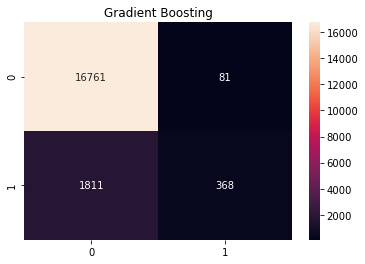

In [271]:
with Timer() as timer:
    from sklearn.ensemble import GradientBoostingClassifier
    gradient_boost = GradientBoostingClassifier()
    #print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
    grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
    title = 'Gradient Boosting'
    plt.title(title);
    print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print ('Temps de calcul',timer.interval)

#### Support vector machine

Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16842
           1       0.87      0.20      0.32      2179

    accuracy                           0.90     19021
   macro avg       0.89      0.60      0.64     19021
weighted avg       0.90      0.90      0.88     19021


Temps de calcul 61.68


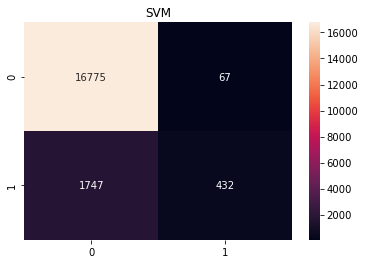

In [272]:
with Timer() as timer:
    from sklearn.svm import SVC
    svc_model = SVC(gamma='auto')
    #print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
    svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
    sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
    title = 'SVM'
    plt.title(title);
    print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print ('Temps de calcul',timer.interval)

#### Random Forest Classifier

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     16842
           1       0.70      0.27      0.39      2179

    accuracy                           0.90     19021
   macro avg       0.81      0.63      0.67     19021
weighted avg       0.89      0.90      0.88     19021


Temps de calcul 3.12


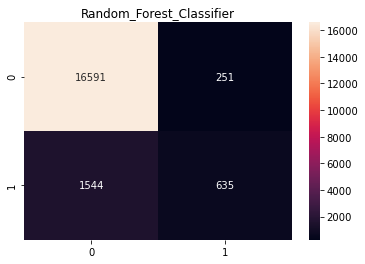

In [273]:
with Timer() as timer:
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=10)
    #print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
    Random_Forest_Classifier_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
    sns.heatmap(Random_Forest_Classifier_matrix, annot=True,  fmt='');
    title = 'Random_Forest_Classifier'
    plt.title(title);
    print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))
print ('Temps de calcul',timer.interval)

#### Logistic Regression

Logistic Regression:           0.89
Temps de calcul 0.35


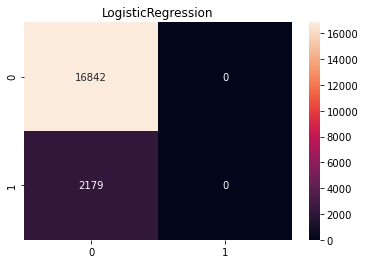

In [274]:
with Timer() as timer:
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs')
    print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))
    LogisticRegression_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, logistic_regression))
    sns.heatmap(LogisticRegression_conf_matrix, annot=True,  fmt='');
    title = 'LogisticRegression'
    plt.title(title);
print ('Temps de calcul',timer.interval)

#### KNeighbors Classifier

K_Neighbor_Classifier:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     16842
           1       0.63      0.32      0.42      2179

    accuracy                           0.90     19021
   macro avg       0.77      0.65      0.69     19021
weighted avg       0.88      0.90      0.89     19021


Temps de calcul 2.26


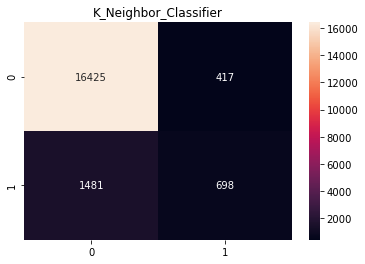

In [275]:
with Timer() as timer:
    from sklearn.neighbors import KNeighborsClassifier
    k_neighbors = KNeighborsClassifier()
    #print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
    K_Neighbor_Class_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, k_neighbors))
    sns.heatmap(K_Neighbor_Class_matrix, annot=True,  fmt='');
    title = 'K_Neighbor_Classifier'
    plt.title(title);
    print('K_Neighbor_Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, k_neighbors))))
print ('Temps de calcul',timer.interval)

##### Nous choisirons ce modèle d'apprentissage qui a de bonnes performances au regard du temps d'entraintement (2s) par rapport au SVM ou GBoosting 30x plus rapide !
##### La Précision (des prédictions positives) est de 0,63 pour prédire une embauche.
##### Le Rappel (sensibilité ou taux de positif réel) : Fraction des embauchés qui ont été correctement prédit est faible 0,32.
##### Le score F1 est la moyenne pondérée de la précision et du rappel qui tient donc compte à la fois des faux positifs et des faux négatifs. F1 est généralement plus utile que la précision, surtout si la distribution des classes est inégale. La précision fonctionne mieux si les faux positifs et les faux négatifs ont un coût similaire. Si le coût des faux positifs et des faux négatifs est très différent, il est préférable d'examiner à la fois la précision et le rappel. Dans notre cas, le score F1 est de 0,90

#### Final Model Selection

In [276]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

In [277]:
GradientBoostingClassifier()

GradientBoostingClassifier()

[0.00820094 0.00324923 0.09646146 0.20116025 0.12858027 0.17713755
 0.19028152 0.19492877]
sexe          0.201160
dispo         0.194929
note          0.190282
specialite    0.177138
diplome       0.128580
salaire       0.096461
age           0.008201
exp           0.003249
dtype: float64


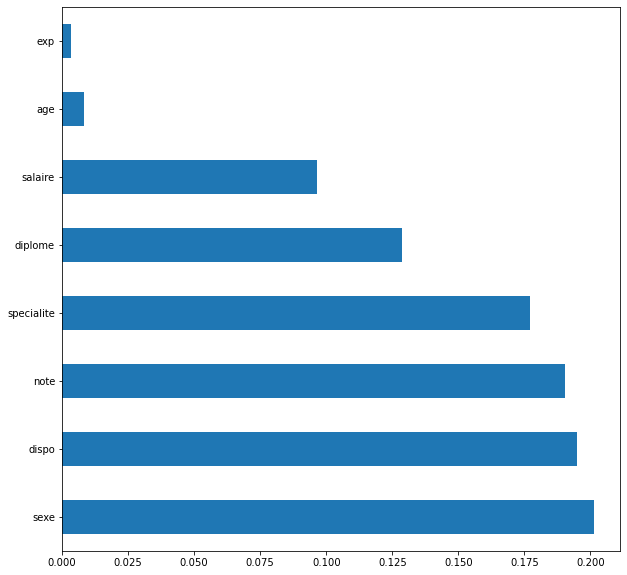

In [278]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))
print(feat_importances)



In [118]:
##### Dans le modèle Gradient Booster, les caractéristiques qui sont les plus importantes sont le sexe, la note, la disponibilité et la disponibilité